0.25 0.15151515151515152
15 0.0008080951539148969
15 0.0008080951539148969
norm error= 0.6233688194842221
0.14285714285714285 0.07751937984496124
32 0.001029090643382456
32 0.001029090643382456
norm error= 0.6395692419380361
0.1 0.04761904761904762
53 0.001057303593346724
53 0.001057303593346724
norm error= 0.5875174434210193
0.07692307692307693 0.03236245954692557
79 0.0010210162429683373
79 0.0010210162429683373
norm error= 0.5388314660980307
0.0625 0.023474178403755867
111 0.0009452711616317739
111 0.0009452711616317739
norm error= 0.4988361784087069
0.05263157894736842 0.017825311942959
148 0.0008865003637870918
148 0.0008865003637870918
norm error= 0.46613855542737204
0.045454545454545456 0.01400560224089636
191 0.0008115824810071939
191 0.0008115824810071939
norm error= 0.4389483532687009
0.04 0.011299435028248588
239 0.0007611782960256818
239 0.0007611782960256818
norm error= 0.41600939812271726
0.03571428571428571 0.009310986964618248
293 0.0007063216026260835
293 0.00070632160

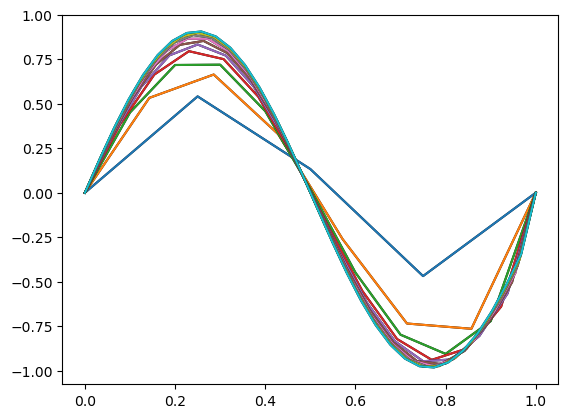

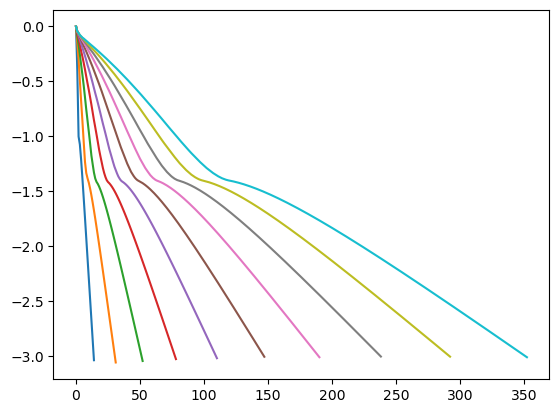

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

#u,t = -V u,x + k u,xx  -lamda u + f

# PHYSICAL PARAMETERS
K = 0.1     #Diffusion coefficient
L = 1.0     #Domain size
Time = 20.  #Integration time


V=1
lamda=1

# NUMERICAL PARAMETERS
NX = 2  #Number of grid points
NT = 10000   #Number of time steps max
ifre=1000000  #plot every ifre time iterations
eps=0.001     #relative convergence ratio
niter_refinement=10      #niter different calculations with variable mesh size

error=np.zeros((niter_refinement))

for iter in range (niter_refinement):
    NX=NX+3

    dx = L/(NX-1)                 #Grid step (space)
    dt = dx**2/(V*dx+K+dx**2)   #Grid step (time)  condition CFL de stabilite 10.4.5
    print(dx,dt)

    ### MAIN PROGRAM ###

    # Initialisation
    x = np.linspace(0.0,1.0,NX)
    T = np.zeros((NX)) #np.sin(2*np.pi*x)
    F = np.zeros((NX))
    rest = []
    RHS = np.zeros((NX))

    Tex = np.zeros((NX)) #np.sin(2*np.pi*x)
    Texx = np.zeros((NX)) #np.sin(2*np.pi*x)
    for j in range (1,NX-1):
        Tex[j] = np.sin(2*j*math.pi/NX)
    for j in range (1,NX-1):
        Texx[j]=(Tex[j+1]-Tex[j-1])/(2*dx)  #np.cos(j*math.pi/NX)*math.pi/NX  
        Txx=(Tex[j+1]-2*Tex[j]+Tex[j-1])/(dx**2)  #-np.sin(j*math.pi/NX)*(math.pi/NX)**2    #
        F[j]=V*Texx[j]-K*Txx+lamda*Tex[j]
        
        
    dt = dx**2/(V*dx+2*K+abs(np.max(F))*dx**2)   #Grid step (time)  condition CFL de stabilite 10.4.5

    plt.figure(1)


    # Main loop en temps
    #for n in range(0,NT):
    n=0
    res=1
    res0=1
    while(n<NT and res/res0>eps):
        n+=1
    #discretization of the advection/diffusion/reaction/source equation
        res=0
        for j in range (1, NX-1):
            xnu=K+0.5*dx*abs(V) 
            Tx=(T[j+1]-T[j-1])/(2*dx)
            Txx=(T[j-1]-2*T[j]+T[j+1])/(dx**2)
            RHS[j] = dt*(-V*Tx+xnu*Txx-lamda*T[j]+F[j])
            res+=abs(RHS[j])

        for j in range (1, NX-1):
            T[j] += RHS[j]
            RHS[j]=0


        if (n == 1 ):
            res0=res

        rest.append(res)
    #Plot every ifre time steps
        if (n%ifre == 0 or (res/res0)<eps):
            print(n,res)
            plotlabel = "t = %1.2f" %(n * dt)
            plt.plot(x,T, label=plotlabel,color = plt.get_cmap('copper')(float(n)/NT))
          

    print(n,res)
    plt.plot(x,T)

    # plt.xlabel(u'$x$', fontsize=26)
    # plt.ylabel(u'$T$', fontsize=26, rotation=0)
    # plt.title(u'ADRS 1D')
    # plt.legend()

    plt.figure(2)
    plt.plot(np.log10(rest/rest[0]))

    err=np.dot(T-Tex,T-Tex)
    errh1=0
    for j in range (1,NX-1):
        errh1+=(Texx[j]-(T[j+1]-T[j-1])/(2*dx))**2
       
    error[iter]=np.sqrt(err)
    print('norm error=',error[iter])


# plt.figure(3)
# plt.plot(x,Tex, label=plotlabel,color = plt.get_cmap('copper')(float(n)/NT))



In [ ]:
1)
xnu = K + 0.5*dx*abs(V) 
Tx = (T[j+1]-T[j-1])/(2*dx)
Txx = (T[j-1]-2*T[j]+T[j+1])/(dx**2)
RHS[j] = dt*(-V*Tx + xnu*Txx - lamda*T[j] + F[j])

In [ ]:
2)
 dt = dx**2/(V*dx+K+dx**2)   #Grid step (time)  condition CFL de stabilite 10.4.5
    print(dx,dt)

    ### MAIN PROGRAM ###

    # Initialisation
    x = np.linspace(0.0,1.0,NX)
    T = np.zeros((NX)) #np.sin(2*np.pi*x)
    F = np.zeros((NX))
    rest = []
    RHS = np.zeros((NX))

    Tex = np.zeros((NX)) #np.sin(2*np.pi*x)
    Texx = np.zeros((NX)) #np.sin(2*np.pi*x)
    for j in range (1,NX-1):
        Tex[j] = np.sin(2*j*math.pi/NX)
    for j in range (1,NX-1):
        Texx[j]=(Tex[j+1]-Tex[j-1])/(2*dx)  #np.cos(j*math.pi/NX)*math.pi/NX  
        Txx=(Tex[j+1]-2*Tex[j]+Tex[j-1])/(dx**2)  #-np.sin(j*math.pi/NX)*(math.pi/NX)**2    #
        F[j]=V*Texx[j]-K*Txx+lamda*Tex[j]
        
        
    dt = dx**2/(V*dx+2*K+abs(np.max(F))*dx**2)   #Grid step (time)  condition CFL de stabilite 10.4.5

In [ ]:
3)